In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [2]:
from ISLP import load_data

In [3]:
car = load_data('carseats')
car.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
car['Y']= (car['Sales']>=8).astype(int)
car['ShelveLoc_enc']= LabelEncoder().fit_transform(car['ShelveLoc'])
car['Urban_enc']= LabelEncoder().fit_transform(car['Urban'])
car['US_enc']= LabelEncoder().fit_transform(car['US'])

In [5]:
car.drop(columns=['Sales', 'ShelveLoc', 'Urban', 'US'], inplace=True)

In [6]:
y= car['Y']
X= car.drop(columns=['Y'])
y.shape, X.shape

((400,), (400, 10))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=39)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 10), (100, 10), (300,), (100,))

In [8]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [9]:
print("Train Accuracy:", dt.score(X_train, y_train))
print("Test Accuracy:", dt.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.65


[Text(0.4988425925925926, 0.9545454545454546, 'Price <= 106.5\ngini = 0.487\nsamples = 300\nvalue = [174, 126]'), Text(0.2175925925925926, 0.8636363636363636, 'Age <= 60.5\ngini = 0.462\nsamples = 102\nvalue = [37, 65]'), Text(0.3582175925925926, 0.9090909090909092, 'True  '), Text(0.12037037037037036, 0.7727272727272727, 'CompPrice <= 112.5\ngini = 0.316\nsamples = 56\nvalue = [11, 45]'), Text(0.07407407407407407, 0.6818181818181818, 'ShelveLoc_enc <= 0.5\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'), Text(0.037037037037037035, 0.5909090909090909, 'Urban_enc <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'), Text(0.018518518518518517, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(0.05555555555555555, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'), Text(0.1111111111111111, 0.5909090909090909, 'Income <= 68.0\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'), Text(0.09259259259259259, 0.5, 'Population <= 420.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'), Text(0.07407407407407407

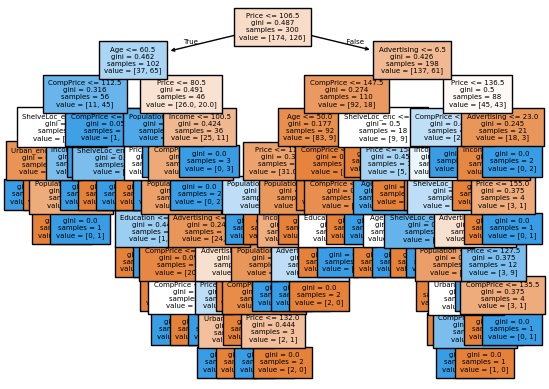

In [10]:
figsize = (15, 15)
print(plot_tree(dt, filled=True, feature_names=X.columns, fontsize=5))

In [11]:
dt.tree_.max_depth, dt.tree_.node_count, dt.tree_.n_leaves

(10, 109, np.int64(55))

In [12]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
path.ccp_alphas, path.impurities

(array([0.        , 0.00218029, 0.003     , 0.003     , 0.00307692,
        0.00315789, 0.0031746 , 0.00324074, 0.00380952, 0.00444444,
        0.005     , 0.005     , 0.005     , 0.00501792, 0.00527473,
        0.0056676 , 0.00583333, 0.00625   , 0.00638606, 0.00814598,
        0.01      , 0.01      , 0.01052189, 0.01082707, 0.012     ,
        0.0125    , 0.01446429, 0.0154371 , 0.0162332 , 0.01843639,
        0.01911376, 0.02198537, 0.02289865, 0.03442593, 0.04862999]),
 array([0.        , 0.00654088, 0.01254088, 0.01854088, 0.02469473,
        0.03101052, 0.03735972, 0.0438412 , 0.05526978, 0.05971422,
        0.06471422, 0.07471422, 0.07971422, 0.08975006, 0.09502479,
        0.11202759, 0.11786092, 0.12411092, 0.1432691 , 0.15141508,
        0.16141508, 0.17141508, 0.18193696, 0.19276403, 0.21676403,
        0.22926403, 0.24372832, 0.30547672, 0.32170992, 0.34014631,
        0.35926007, 0.38124544, 0.40414409, 0.43857001, 0.4872    ]))

Text(0, 0.5, 'Total Impurity')

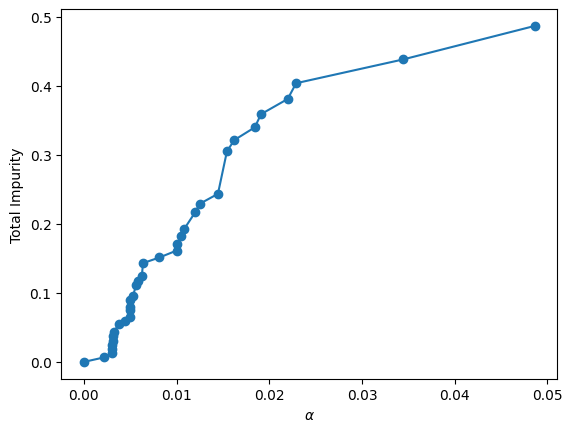

In [13]:
plt.plot(path.ccp_alphas, path.impurities, marker='o')
# plt.xlabel('Effective Alpha')
plt.xlabel(r'$\alpha$')
plt.ylabel('Total Impurity')

In [14]:
clfs = []
for ccp_alpha in path.ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0.5, 0, '$\\alpha$')

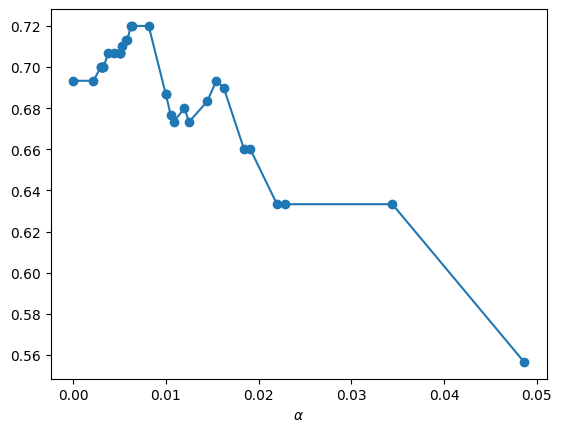

In [15]:
# average cv accuracy results on the train set
cv_scores = [cross_val_score(clf, X_train, y_train, cv=5).mean() for clf in clfs]
plt.plot(path.ccp_alphas, cv_scores, marker='o')
plt.xlabel(r'$\alpha$')

In [16]:
path.ccp_alphas[np.argmax(cv_scores)]

np.float64(0.00814597588791137)